# Assignment 3: Logistic Regression


## Problem statement

You are working as a Data Scientist at a Finance company which proposes home loans. When a customer applies for a home loan, the company studies his demand to decide whether he/she is eligible or not.

Your boss asks you to develop a decision-aid tool to automate the loan eligibility process. The tool is supposed to be given as input the information provided by the customer while filling his/her online loan application form. These information include customer's personal citeria such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, etc... To develop the algorithm/model to be applied in the tool, you are given a data set containing historical information about applicants (**features**) as well as their loan status (**output** given as binary variable indicating whether or not a the loan was approved).

![image.png](attachment:image.png)

1- Load data

In [ ]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

In [ ]:
df = pd.read_csv('loan_prediction.csv')
df.shape


(614, 13)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
assert df.shape == (614, 13)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2- Remove the "Loan_ID" column, and then transform the "Loan_Status" feature from categorical into numerical values (Y ==> 1, N ==> 0)

In [ ]:
to_drop =['Loan_ID']
df.drop(to_drop, axis = 1, inplace = True)
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})



In [ ]:
assert df.shape == (614, 12); assert df["Loan_Status"].dtype != 'O'
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


## Data Exploration

3- Build a dataframe named `stats` displaying information about df columns. The index is the columns names and the columns are the following :

* `type` : type of the column
* `# null` : number of null values
* `# unique` : number of unique values
* `unique values` : unique values, concatenated as one text separated with ` - `. If the number of unique values is greater than equal 10 (>= 10), print only the the first *20* characters followed by `...`

`stats` would look like this (only the last rows are displayed)

![](img/stats.png)

In [ ]:
# your code here

stats = pd.DataFrame(index = df.columns, columns={'type', '# null', '# unique', 'unique values'})
stats['type'] = df.dtypes
stats['# null'] = df.isnull().sum()
stats['# unique'] = df.nunique()
for cols in df: 
    new = df[cols].unique()
    new = "-".join(str(x) for x in new)
    stats['unique values'][cols] = new

stats

,# null,unique values,# unique,type
Gender,13,Male-Female-nan,2,object
Married,3,No-Yes-nan,2,object
Dependents,15,0-1-2-3+-nan,4,object
Education,0,Graduate-Not Graduate,2,object
Self_Employed,32,No-Yes-nan,2,object
ApplicantIncome,0,5849-4583-3000-2583-6000-5417-2333-3036-4006-1...,505,int64
CoapplicantIncome,0,0.0-1508.0-2358.0-4196.0-1516.0-2504.0-1526.0-...,287,float64
LoanAmount,22,nan-128.0-66.0-120.0-141.0-267.0-95.0-158.0-16...,203,float64
Loan_Amount_Term,14,360.0-120.0-240.0-nan-180.0-60.0-300.0-480.0-3...,10,float64
Credit_History,50,1.0-0.0-nan,2,float64


In [ ]:
df['Married'].isna().sum()

3

4- Fill the null values in the column **[Married]** by the most frequent one (which is "Yes"). Then, remove all the rows containing at least one NullValue.

In [ ]:
df = df.fillna(value = {'Married' : df['Married'].mode().iloc[0]})
df = df.dropna()
print(df.shape)
df

(480, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [ ]:
assert df.isnull().sum().sum() == 0


# Data Visualization

5-1- Plot a **bar plot** of the column **Loan_Status** (% of each class). 

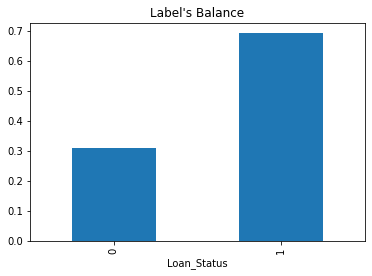

In [ ]:
(df.groupby('Loan_Status').size()/df.shape[0]).plot(kind="bar",title="Label's Balance")


5-2- How many approved and non approved loans are there ? How much accuracy can you get if prediction is always equal to "*1*" ?

In [ ]:
approved_Loans = df['Loan_Status'].value_counts()[1]
unapproved_Loans = df['Loan_Status'].value_counts()[0]
print("Number of approved loans : ")
print(approved_Loans)
print("Number of unapproved loans : ")
print(unapproved_Loans)

Number of approved loans : 
332
Number of unapproved loans : 
148


In [ ]:
# your answer here
prediction = approved_Loans / (approved_Loans + unapproved_Loans)
print(prediction)

0.6916666666666667


6-1- Create a function to be named **make_bar_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a borplot of the approval rate `Loan_Status` by value of the column.

Calling `make_bar_plot` on `Property_Area` should look like this

![](img/bar_plot.png)

In [ ]:
def make_bar_plot(df, column):
    ploter = pd.DataFrame()
    ploter['total']=df.groupby(column).size()
    ploter['Given_Loan'] = df.groupby(column).sum()['Loan_Status']
    ploter['percentage'] = round(ploter['Given_Loan']/ploter['total']*100,2)
    #print(ploter)
    ploter['Given_Loan'].plot(kind="bar")
    ploter['total'].plot(kind="bar",alpha=0.5,title="Loans per "+str(column))
    plt.show()

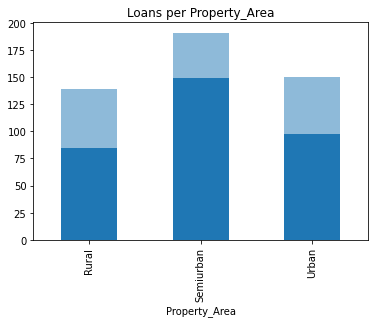

In [ ]:
make_bar_plot(df, 'Property_Area')

6-2- Create a function to be named **make_box_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a boxplot of the distribution of the column by `Loan_Status`.

Calling `make_box_plot` on `ApplicantIncome` should look like this

![](img/box_plot.png)

In [ ]:
def make_box_plot(df, col):
  df.boxplot(by ='Loan_Status', column = col, grid = False)
  plt.xlabel('Loan_Status')
  plt.ylabel(col)
  plt.title("")
  plt.show()

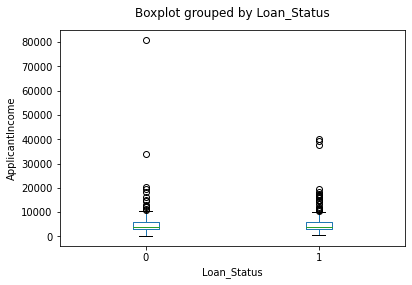

In [ ]:
make_box_plot(df, 'ApplicantIncome')

6-3- Loop through df columns, except for the target and make a plot depending:

* if the column is numeric, call `make_box_plot`
* else, call `make_bar_plot`

****************** Gender *******************


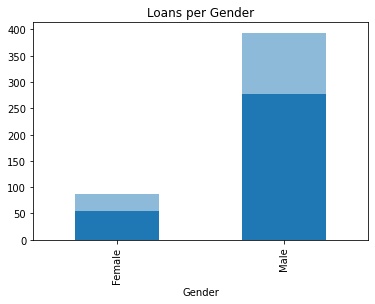

****************** Married *******************


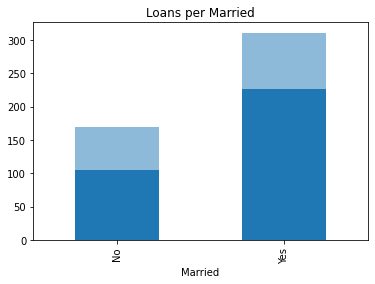

****************** Dependents *******************


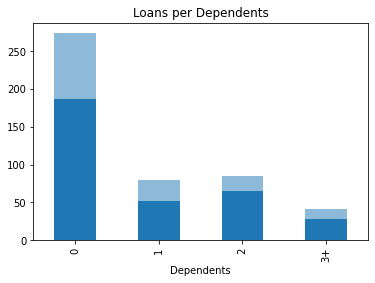

****************** Education *******************


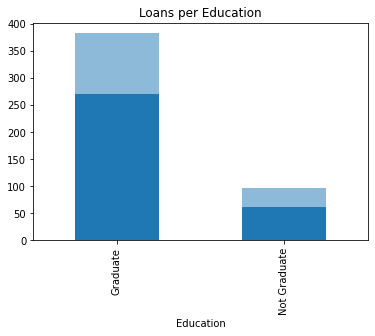

****************** Self_Employed *******************


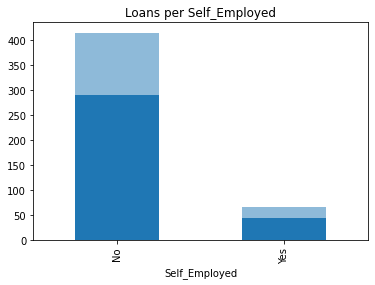

****************** ApplicantIncome *******************


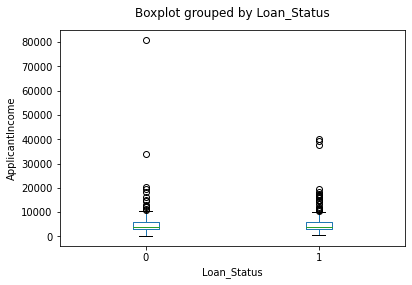

****************** CoapplicantIncome *******************


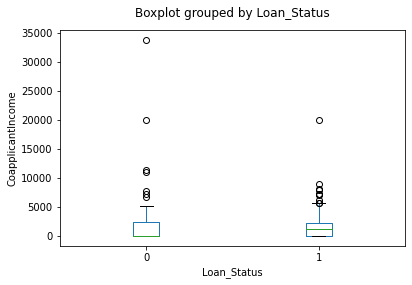

****************** LoanAmount *******************


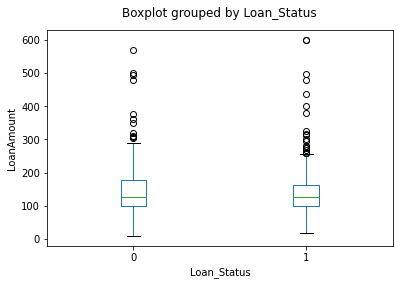

****************** Loan_Amount_Term *******************


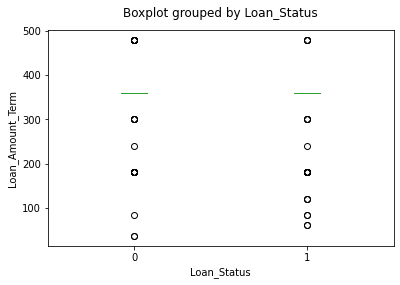

****************** Credit_History *******************


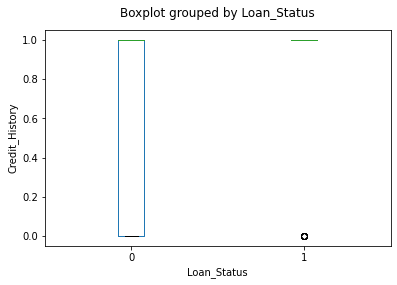

****************** Property_Area *******************


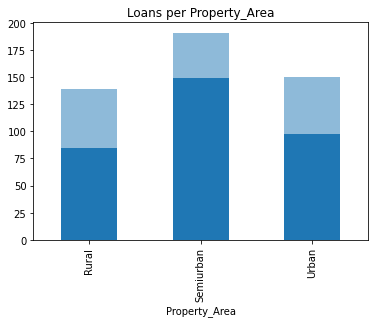

In [ ]:
from pandas.api.types import is_numeric_dtype

for col in df:
  if (col != 'Loan_Status'):
    print(f'****************** {col} *******************')
    if is_numeric_dtype(df[col]): 
      make_box_plot(df, col)
    
    else:
      make_bar_plot(df, col)


# Model Training & Evaluation

7-1- Use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform `Property_Area` and `Dependents` into dummy variables

In [ ]:
df = pd.get_dummies(df, columns = ['Property_Area', 'Dependents'])

print the head of df

In [ ]:
df.head

<bound method NDFrame.head of      Gender Married     Education  ... Dependents_1  Dependents_2  Dependents_3+
1      Male     Yes      Graduate  ...            1             0              0
2      Male     Yes      Graduate  ...            0             0              0
3      Male     Yes  Not Graduate  ...            0             0              0
4      Male      No      Graduate  ...            0             0              0
5      Male     Yes      Graduate  ...            0             1              0
..      ...     ...           ...  ...          ...           ...            ...
609  Female      No      Graduate  ...            0             0              0
610    Male     Yes      Graduate  ...            0             0              1
611    Male     Yes      Graduate  ...            1             0              0
612    Male     Yes      Graduate  ...            0             1              0
613  Female      No      Graduate  ...            0             0              

In [ ]:
assert df.shape == (480, 17)

7-2- Use `pandas.Categorical` (as seen in *Titanic* notebook) to transform the remaining text columns of df into numerical ones

In [ ]:
for col in range (len(df.columns)):
  if df.iloc[:, col].dtype == 'object':  # check if column's type is object (text)
    df.iloc[:, col] = pd.Categorical(df.iloc[:, col]).codes  # convert text to numerical

Print the head of df

In [ ]:
print(df.head)

<bound method NDFrame.head of      Gender  Married  Education  ...  Dependents_1  Dependents_2  Dependents_3+
1         1        1          0  ...             1             0              0
2         1        1          0  ...             0             0              0
3         1        1          1  ...             0             0              0
4         1        0          0  ...             0             0              0
5         1        1          0  ...             0             1              0
..      ...      ...        ...  ...           ...           ...            ...
609       0        0          0  ...             0             0              0
610       1        1          0  ...             0             0              1
611       1        1          0  ...             1             0              0
612       1        1          0  ...             0             1              0
613       0        0          0  ...             0             0              0

[480 rows

In [ ]:
assert 'object' not in [df[f].dtype for f in df.columns]

8-1 Load the target variable "Loan_Status" into a dataframe and call it y. Then, load the features into a second dataframe and call it X. 

In [ ]:
Y = df.Loan_Status
X = df.drop('Loan_Status', axis = 1, inplace = False)
print (X.columns)

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')


8-2 Split the data set into a training set and a test set. Set: test_size=0.3, random_state=123

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 123)

print ("train shape", X_train.shape)
print ("test shape", X_test.shape)

train shape (336, 16)
test shape (144, 16)


8-3- Fit a logistic model to the training set, and then report the training and testing accuracies

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1)
clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.7976190476190477
test accuracy = 0.7986111111111112


9- Print the confusion matrix and compute the **precision** for class **0**, **recall** for class **1** using the formulas learned in class (you should not use metrics.classification_report)

In [ ]:
from sklearn import metrics
y_pred = clf.predict(X_test)
matrix = metrics.confusion_matrix(y_test, y_pred)
print (matrix)

In [ ]:
#precision is (true positive) / (true positive + false positive)
precision_0 = matrix[0][0] / (matrix[0][0] + matrix[1][0])

#recall is (true positive) / (true positive + false negative)
recall_1 = matrix[1][1] / (matrix[1][1] + matrix[1][0])
print ('precision_0 =', precision_0)
print ('recall_1 =', recall_1)

10- Use 5-fold [cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and choose `f1` for scoring. Print the mean and standard deviation of scores

In [ ]:
# evaluate the model using 5-fold cross-validation
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(random_state=1)
scores = cross_val_score(clf, df, df["Loan_Status"], scoring='accuracy', cv=5)

print ("scores = ", scores)
print ('scores mean =', scores.mean(), ', scores std =', scores.std())

how is the mean `f1_score` compared to the first one with train_test_split

Looks good. It's still performing at the same range of f1 score.